In [1]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px


%matplotlib inline
sns.set()  
import scipy.stats as stats


# Exploratory Data Analysis (EDA)


## Our Dataset: 
**Dataset Name::** CHR_Data2021.csv (located in the assign_wk4 folder)<br>
The County Health Rankings (CHR) dataset measures a variety of factors that influence the health of a community. CHR uses more than 30 measures that help communities understand how healthy their residents are today (health outcomes) and what will impact their health in the future (health factors).
The CHR_DataDictionary_2021.pdf files provides a description of the individual columns within the dataset.


# Deliverables:

##   1. Describe the data within the dataset
       - Data types: Categorical vs Continuous variables
       - Statistical summary, etc.

In [2]:
# loading dataset 
chr_df = pd.read_csv("C:/Users/stanl/Regis Data Analysis/Week 4/assign_wk4/CHR_Data2021.csv", low_memory=False)


In [3]:
# quick preview of DF
chr_df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,% Females raw value,% Females numerator,% Females denominator,% Females CI low,% Females CI high,% Rural raw value,% Rural numerator,% Rural denominator,% Rural CI low,% Rural CI high
0,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v057_rawvalue,v057_numerator,v057_denominator,v057_cilow,v057_cihigh,v058_rawvalue,v058_numerator,v058_denominator,v058_cilow,v058_cihigh
1,00,000,00000,US,United States,2021,NaN,6906.6410942,3854074,915437195,...,0.5075019531,166582199,328239523,NaN,NaN,0.1926902892,NaN,NaN,NaN,NaN
2,01,000,01000,AL,Alabama,2021,NaN,9819.8874313,82249,13651801,...,0.5167392215,2533668,4903185,NaN,NaN,0.409631829,1957932,4779736,NaN,NaN
3,01,001,01001,AL,Autauga County,2021,1,7830.0534837,787,155765,...,0.5150799191,28777,55869,NaN,NaN,0.4200216232,22921,54571,NaN,NaN
4,01,003,01003,AL,Baldwin County,2021,1,7680.4772697,3147,600539,...,0.5150962667,114987,223234,NaN,NaN,0.4227909911,77060,182265,NaN,NaN


In the first row [0] we see that there is a second header which is associated with 'Data Dictionary' accompanying the csv file. This shows measures for each column. We will remove this row to have a cleaner set of data with no outlier of strings.

In [4]:
chr_df.drop([0], inplace=True)
chr_df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,% Females raw value,% Females numerator,% Females denominator,% Females CI low,% Females CI high,% Rural raw value,% Rural numerator,% Rural denominator,% Rural CI low,% Rural CI high
1,00,000,00000,US,United States,2021,NaN,6906.6410942,3854074,915437195,...,0.5075019531,166582199,328239523,NaN,NaN,0.1926902892,NaN,NaN,NaN,NaN
2,01,000,01000,AL,Alabama,2021,NaN,9819.8874313,82249,13651801,...,0.5167392215,2533668,4903185,NaN,NaN,0.409631829,1957932,4779736,NaN,NaN
3,01,001,01001,AL,Autauga County,2021,1,7830.0534837,787,155765,...,0.5150799191,28777,55869,NaN,NaN,0.4200216232,22921,54571,NaN,NaN
4,01,003,01003,AL,Baldwin County,2021,1,7680.4772697,3147,600539,...,0.5150962667,114987,223234,NaN,NaN,0.4227909911,77060,182265,NaN,NaN
5,01,005,01005,AL,Barbour County,2021,1,11476.629416,515,69011,...,0.4707931621,11622,24686,NaN,NaN,0.677896347,18613,27457,NaN,NaN


In [5]:
chr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3194 entries, 1 to 3194
Columns: 690 entries, State FIPS Code to % Rural CI high
dtypes: object(690)
memory usage: 16.8+ MB


In [6]:
chr_df.shape

(3194, 690)

The original shape shows 3,194 rows and 690 Columns

Next we will see how many null values encompass each column.

Reviewing the null counts but also the data types. We have to use verbose=True to determine the entire list of 690 columns

In [7]:
chr_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3194 entries, 1 to 3194
Data columns (total 690 columns):
 #    Column                                                                                   Non-Null Count  Dtype 
---   ------                                                                                   --------------  ----- 
 0    State FIPS Code                                                                          3194 non-null   object
 1    County FIPS Code                                                                         3194 non-null   object
 2    5-digit FIPS Code                                                                        3194 non-null   object
 3    State Abbreviation                                                                       3194 non-null   object
 4    Name                                                                                     3194 non-null   object
 5    Release Year                                                

Just a quick scan shows we have quite the null count. We will now explore the % of each column to decide a more normalized count.

#### Determining null values by percentage of each column

In [8]:
NullValues=chr_df.isnull().sum()/len(chr_df)

In [9]:
NullValues.sort_values().tail(300)

Median household income CI high (AIAN)    0.596744
Infant mortality denominator              0.598622
Infant mortality numerator                0.598622
Infant mortality raw value                0.598622
Infant mortality CI high                  0.598622
                                            ...   
Reading scores denominator                1.000000
Reading scores CI low                     1.000000
Reading scores CI high                    1.000000
Other primary care providers CI low       1.000000
% Rural CI high                           1.000000
Length: 300, dtype: float64

Data Description:
   
The dataset we are reviewing are the county health rankings for 2021. We see 3195 rows and 690 columns. We see a significant portion of columns have 99% null values (over half). In addition, see many different categorical variables like country ranked, premature death flag, and ranges that can become categorical like ' LBW unreliable indicator (Unreliable = Numerator < 20 or relative standard error > 20%)'. I have also done a percentage calculation for the null values to determine the percentage as mentioned. By using the isnull.sum function divided by the length of our dataframe we can fiter out columns by how much they truly are providing a clear record. Given that this dataframe has different data types we will not have complete descriptive statistics.As we continue to clean we will get a better picture.

##      2. Data Cleaning
       - Identify and hanlde missing values
       - Identify and hanlde outliers

Given that we have taken percentages of the null values for each column we can start to drop columns based on these rankings. We will begun filtering them down in 25% increments to understand how much of the dataset is removed.

#### Removing columns over 75% null as the first run.

In [10]:
clean_df = chr_df.loc[:, chr_df.isnull().mean() < .75]

In [11]:
clean_df.shape

(3194, 431)

Our shape has changed from 690 columns to 431, a difference 259.

#### What if we remove 50% of null values that populate a column?

In [12]:
clean_df = chr_df.loc[:, chr_df.isnull().mean() < .50]

In [13]:
clean_df.shape

(3194, 346)

431 to 346 rows, a difference of 49.8% from our original rows count

Let us also clean up some intial columns that are joined numbers, similar to a primary key in SQL. We see that State Fips, County Fips, and 5 digit FIPS are related. Lets remove State and County as the 5 digit is the main identifier for each record.

In [14]:
clean_df.head(3)

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,% not proficient in English numerator,% not proficient in English denominator,% not proficient in English CI low,% not proficient in English CI high,% Females raw value,% Females numerator,% Females denominator,% Rural raw value,% Rural numerator,% Rural denominator
1,00,000,00000,US,United States,2021,NaN,6906.6410942,3854074,915437195,...,13193113,304930125,0.0430007335,0.0435313072,0.5075019531,166582199,328239523,0.1926902892,NaN,NaN
2,01,000,01000,AL,Alabama,2021,NaN,9819.8874313,82249,13651801,...,50445,4583063,0.0104453592,0.0115683028,0.5167392215,2533668,4903185,0.409631829,1957932,4779736
3,01,001,01001,AL,Autauga County,2021,1,7830.0534837,787,155765,...,419,52163,0.0028195458,0.0132454811,0.5150799191,28777,55869,0.4200216232,22921,54571


In [15]:
clean_df.drop(['State FIPS Code','County FIPS Code'], axis = 1, inplace=True)
clean_df.shape

C:\Users\stanl\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(3194, 344)

For this specific project we will create a subset of this data so we can focus in some specific outcomes and what relationships these features may have with one another. 

The subset we will create is based on physical activity, obesity, mental health, access to excercise, and premature death.

In [16]:
 subset = clean_df[['Name','Premature death raw value','Physical inactivity raw value','Adult obesity raw value',
                   'Access to exercise opportunities raw value','Poor mental health days raw value']]
subset.head()

,Name,Premature death raw value,Physical inactivity raw value,Adult obesity raw value,Access to exercise opportunities raw value,Poor mental health days raw value
1,United States,6906.6410942,0.227,0.297,0.8416869169,4.0627918637
2,Alabama,9819.8874313,0.293,0.361,0.6111228737,4.8856364811
3,Autauga County,7830.0534837,0.306,0.33,0.6913012406,4.8502135182
4,Baldwin County,7680.4772697,0.247,0.3,0.7371354895,4.7682935308
5,Barbour County,11476.629416,0.28,0.412,0.5316676986,5.5904935124


I will remove United States and other to focus purely Counties

In [17]:
subset = subset[subset['Name'].str.contains('County')]

In [18]:
subset.head()

,Name,Premature death raw value,Physical inactivity raw value,Adult obesity raw value,Access to exercise opportunities raw value,Poor mental health days raw value
3,Autauga County,7830.0534837,0.306,0.33,0.6913012406,4.8502135182
4,Baldwin County,7680.4772697,0.247,0.3,0.7371354895,4.7682935308
5,Barbour County,11476.629416,0.28,0.412,0.5316676986,5.5904935124
6,Bibb County,12172.562382,0.334,0.374,0.1625136374,5.2711142294
7,Blount County,11096.050649,0.333,0.33,0.1563448589,5.3578091017


In [19]:
subset.duplicated().any()

False

In [20]:
print(f'Before: {subset.shape}')
subset.drop_duplicates(inplace=True)
print(f'After: {subset.shape}')

Before: (3007, 6)
After: (3007, 6)


No duplicates :-)

In [21]:
subset.isnull().sum()

Name                                           0
Premature death raw value                     57
Physical inactivity raw value                  0
Adult obesity raw value                        0
Access to exercise opportunities raw value     0
Poor mental health days raw value              0
dtype: int64

In [22]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3007 entries, 3 to 3194
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Name                                        3007 non-null   object
 1   Premature death raw value                   2950 non-null   object
 2   Physical inactivity raw value               3007 non-null   object
 3   Adult obesity raw value                     3007 non-null   object
 4   Access to exercise opportunities raw value  3007 non-null   object
 5   Poor mental health days raw value           3007 non-null   object
dtypes: object(6)
memory usage: 164.4+ KB


In [23]:
subset.dropna(inplace=True)
subset.isnull().sum()

Name                                          0
Premature death raw value                     0
Physical inactivity raw value                 0
Adult obesity raw value                       0
Access to exercise opportunities raw value    0
Poor mental health days raw value             0
dtype: int64

In [24]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2950 entries, 3 to 3194
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Name                                        2950 non-null   object
 1   Premature death raw value                   2950 non-null   object
 2   Physical inactivity raw value               2950 non-null   object
 3   Adult obesity raw value                     2950 non-null   object
 4   Access to exercise opportunities raw value  2950 non-null   object
 5   Poor mental health days raw value           2950 non-null   object
dtypes: object(6)
memory usage: 161.3+ KB


We have now dropped null objects and Names other than the counties bringing us to 2,950

#### Structuring different datatypes

We will address each column (feature) by what the data represents. This will give us the best way to assign a data type. 

In [25]:
subset['Name'] = subset['Name'].astype(str)
subset['Premature death raw value'] = subset['Premature death raw value'].astype(float)
subset['Physical inactivity raw value'] = subset['Physical inactivity raw value'].astype(float)
subset['Adult obesity raw value'] = subset['Adult obesity raw value'].astype(float)
subset['Access to exercise opportunities raw value'] = subset['Access to exercise opportunities raw value'].astype(float)
subset['Poor mental health days raw value'] = subset['Poor mental health days raw value'].astype(float)


subset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2950 entries, 3 to 3194
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Name                                        2950 non-null   object 
 1   Premature death raw value                   2950 non-null   float64
 2   Physical inactivity raw value               2950 non-null   float64
 3   Adult obesity raw value                     2950 non-null   float64
 4   Access to exercise opportunities raw value  2950 non-null   float64
 5   Poor mental health days raw value           2950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 161.3+ KB


In [26]:
subset.describe()

,Premature death raw value,Physical inactivity raw value,Adult obesity raw value,Access to exercise opportunities raw value,Poor mental health days raw value
count,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000
mean,8435.776414,0.266946,0.334882,0.628551,4.674981
std,2664.879190,0.058630,0.058776,0.224859,0.660087
min,1625.721002,0.089000,0.110000,0.000000,2.693138
25%,6593.514548,0.227000,0.298000,0.489756,4.233427
50%,8162.718371,0.264000,0.338000,0.657919,4.706100
75%,9949.517743,0.306000,0.374000,0.794692,5.119072
max,34538.518580,0.504000,0.589000,1.000000,7.287595


Now that we have converted the columns to float we can see formal descriptive statistics! These statistics will now help us determine how we can create a categorical for Premature death raw value. The undestanding being that premature death can be better correlated to physical activity, obesity, access to exercise, and poor mental health. 

Renaming Premature Death Raw value

In [27]:
subset.rename(columns = {'Premature death raw value':'Premature_Death'}, inplace = True)
subset.head()

,Name,Premature_Death,Physical inactivity raw value,Adult obesity raw value,Access to exercise opportunities raw value,Poor mental health days raw value
3,Autauga County,7830.053484,0.306,0.330,0.691301,4.850214
4,Baldwin County,7680.477270,0.247,0.300,0.737135,4.768294
5,Barbour County,11476.629416,0.280,0.412,0.531668,5.590494
6,Bibb County,12172.562382,0.334,0.374,0.162514,5.271114
7,Blount County,11096.050649,0.333,0.330,0.156345,5.357809


#### Creating the categorical range for premature death

In [28]:
#add a new column category next to the premature death group. 
category = pd.cut(subset.Premature_Death,bins=[0,6594,8163,9950,34539],labels=['Low','Med','Med-High','High'])
subset.insert(1,'Risk',category)
subset['Risk'].value_counts(normalize=True)

Low         0.250169
Med         0.250169
Med-High    0.250169
High        0.249492
Name: Risk, dtype: float64

In [29]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2950 entries, 3 to 3194
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   Name                                        2950 non-null   object  
 1   Risk                                        2950 non-null   category
 2   Premature_Death                             2950 non-null   float64 
 3   Physical inactivity raw value               2950 non-null   float64 
 4   Adult obesity raw value                     2950 non-null   float64 
 5   Access to exercise opportunities raw value  2950 non-null   float64 
 6   Poor mental health days raw value           2950 non-null   float64 
dtypes: category(1), float64(5), object(1)
memory usage: 164.4+ KB


In [30]:
subset.nunique()

Name                                          1712
Risk                                             4
Premature_Death                               2950
Physical inactivity raw value                  307
Adult obesity raw value                        323
Access to exercise opportunities raw value    2919
Poor mental health days raw value             2950
dtype: int64

Removing Name column, given we are concerned with simply prediciting premature death, we will not be discussing which location at this time.

In [31]:
subset.drop(['Name'], axis = 1, inplace=True)

In [32]:
subset.head()

,Risk,Premature_Death,Physical inactivity raw value,Adult obesity raw value,Access to exercise opportunities raw value,Poor mental health days raw value
3,Med,7830.053484,0.306,0.330,0.691301,4.850214
4,Med,7680.477270,0.247,0.300,0.737135,4.768294
5,High,11476.629416,0.280,0.412,0.531668,5.590494
6,High,12172.562382,0.334,0.374,0.162514,5.271114
7,High,11096.050649,0.333,0.330,0.156345,5.357809


### Outliers

<AxesSubplot:>

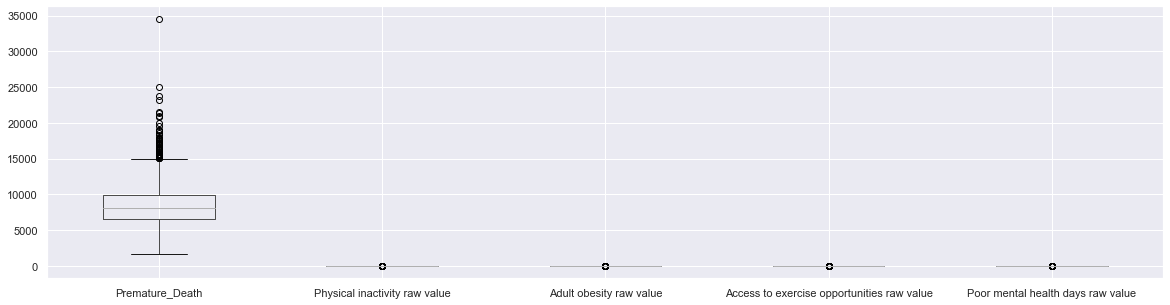

In [33]:
subset.boxplot(figsize=(20,5))

We can see that Premature death has many outliers. Let's see what a scatterplot shows compared to categorical data. Will there be a linear relationship between Premature_Death and Adult Obesity? 

<AxesSubplot:xlabel='Premature_Death', ylabel='Poor mental health days raw value'>

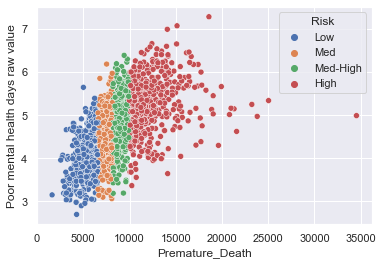

In [34]:
sns.scatterplot(data=subset,x='Premature_Death', y='Poor mental health days raw value',hue='Risk')

In [35]:
subset = subset.iloc[:, 1:6]
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2950 entries, 3 to 3194
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Premature_Death                             2950 non-null   float64
 1   Physical inactivity raw value               2950 non-null   float64
 2   Adult obesity raw value                     2950 non-null   float64
 3   Access to exercise opportunities raw value  2950 non-null   float64
 4   Poor mental health days raw value           2950 non-null   float64
dtypes: float64(5)
memory usage: 138.3 KB


It does appear that there is a linear relationship between these two. There are outliers as confirmed in the box plot prior. 
We will now remove the outliers.

### We will check to see what our error is without addressing outliers

In [36]:
# evaluate model on the raw dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# retrieve the array
data = subset.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.358


### Now applying a model to remove outliers and retest

In [37]:
# evaluate model on training dataset with outliers removed

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error

# retrieve the array
data = subset.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(1976, 4) (1976,)
(1948, 4) (1948,)
MAE: 0.358


#### No change between the two of them, no increase in accuracy,. However, the MAE is 0.358 so the accuracy is quite low.

##   3. Feature Selection
       - Graphical visualization of features 
       - Examine the realtionships within the dataset - using 2 different methods
       - Reduction of the dimensionality of the dataset

### Pairplot

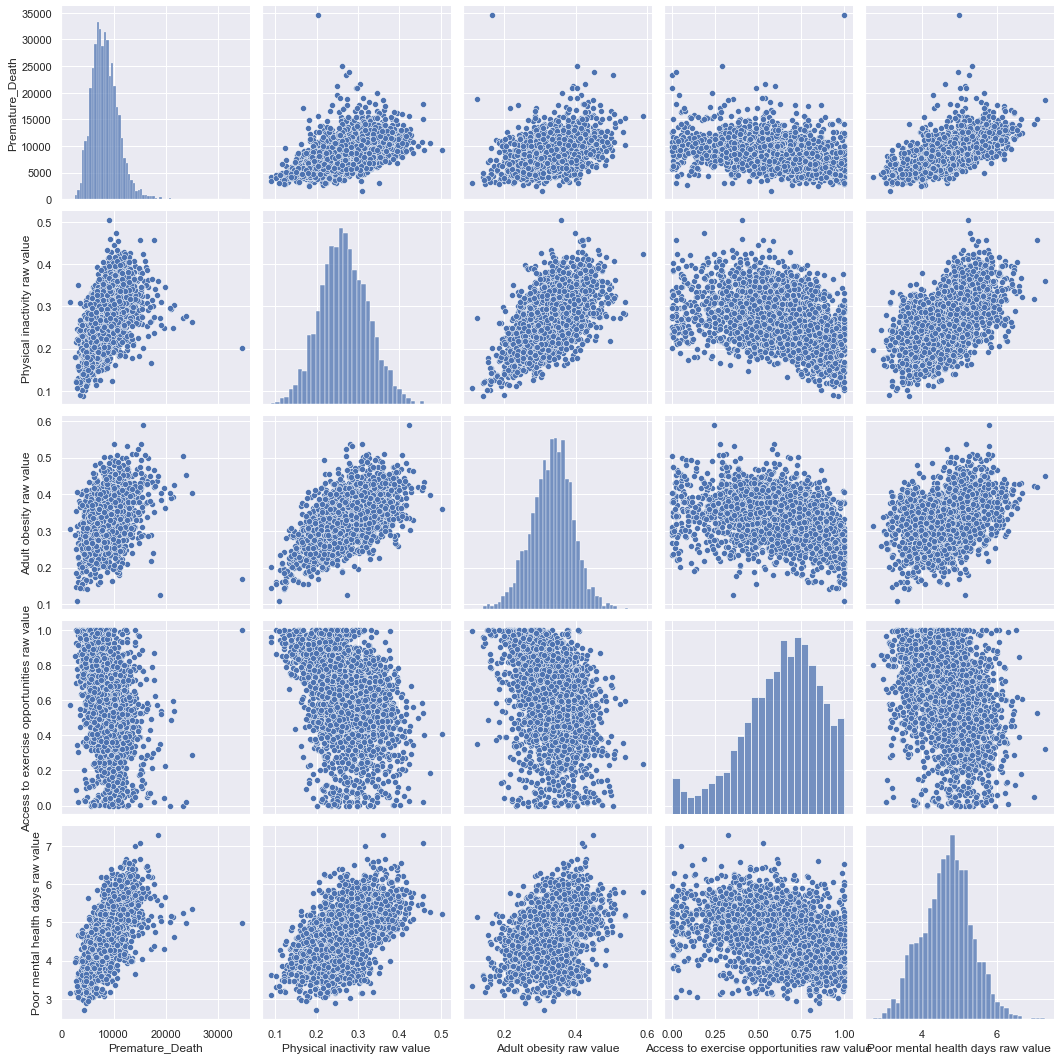

In [38]:
sns.pairplot(subset, height=3)

We can see that there are quite a few linear relationships. Adult obesity and physical inactivity, premature death is linear except for access to exercise. Poor mental health and physical inactivty is one that many have been told are correlated. Working out simply puts you in a better place mentally and physically. 

#### Correlation matrix 

In [39]:
corrmat = subset.corr()
corrmat

,Premature_Death,Physical inactivity raw value,Adult obesity raw value,Access to exercise opportunities raw value,Poor mental health days raw value
Premature_Death,1.000000,0.537059,0.405922,-0.381288,0.645016
Physical inactivity raw value,0.537059,1.000000,0.577686,-0.410261,0.534379
Adult obesity raw value,0.405922,0.577686,1.000000,-0.318854,0.355040
Access to exercise opportunities raw value,-0.381288,-0.410261,-0.318854,1.000000,-0.335470
Poor mental health days raw value,0.645016,0.534379,0.355040,-0.335470,1.000000


#### Heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

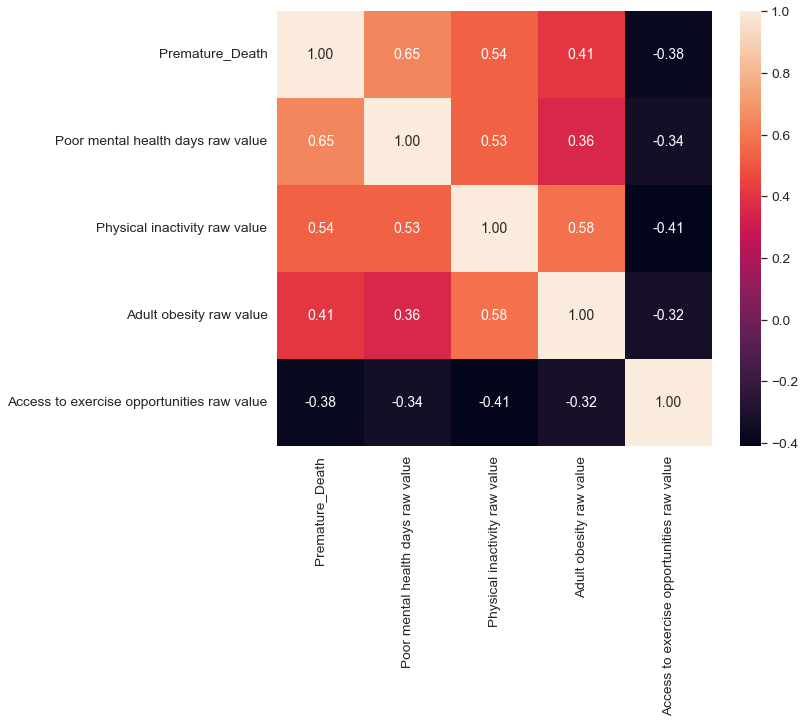

In [40]:
k = 6
cols = corrmat.nlargest(k, 'Premature_Death')['Premature_Death'].index

#Numpy corrcoef gives a pearson correlation coefficient
cm = np.corrcoef(subset[cols].values.T)
sns.set(font_scale = 1.25)
f, ax = plt.subplots(figsize=(10,8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':14},yticklabels=cols.values, xticklabels=cols.values)
plt.show


We now see correlations inside the heatmap which support the relationship with death and mental heath. 

### Determining Feature | Random Forest

In [41]:
corrmat.columns

Index(['Premature_Death', 'Physical inactivity raw value',
       'Adult obesity raw value', 'Access to exercise opportunities raw value',
       'Poor mental health days raw value'],
      dtype='object')

In [42]:
#missing data, address dataframe used
total = subset.isnull().sum().sort_values(ascending=False)
percent = (subset.isnull().sum()/subset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Premature_Death,0,0.0
Physical inactivity raw value,0,0.0
Adult obesity raw value,0,0.0
Access to exercise opportunities raw value,0,0.0
Poor mental health days raw value,0,0.0


No missing data!

In [43]:
X = subset[corrmat.columns[1:5]]
X #defininig X

,Physical inactivity raw value,Adult obesity raw value,Access to exercise opportunities raw value,Poor mental health days raw value
3,0.306,0.330,0.691301,4.850214
4,0.247,0.300,0.737135,4.768294
5,0.280,0.412,0.531668,5.590494
6,0.334,0.374,0.162514,5.271114
7,0.333,0.330,0.156345,5.357809
...,...,...,...,...
3190,0.244,0.303,0.896863,3.980964
3191,0.108,0.110,0.997182,3.337136
3192,0.251,0.352,0.840184,4.239036
3193,0.287,0.292,0.831829,4.081120


In [44]:
y = subset['Premature_Death'].values
y

array([ 7830.0534837,  7680.4772697, 11476.629416 , ...,  8081.0512078,
        6541.0741501,  3858.4656765])

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
model = RandomForestRegressor()

In [47]:
model.fit(X,y)

RandomForestRegressor()

In [48]:
importance_list = list(zip(X.columns, model.feature_importances_))
sorted_importance = sorted(importance_list, key=lambda x: x[1], reverse=True)
sorted_importance
# importance = model.feature_importances_
# X.columns

[('Poor mental health days raw value', 0.5298110973558363),
 ('Adult obesity raw value', 0.16779621126922395),
 ('Physical inactivity raw value', 0.1591623367273657),
 ('Access to exercise opportunities raw value', 0.1432303546475741)]

In [49]:
max_feature_len = len(max(X.columns, key=len))

In [50]:
for feature, rank in sorted_importance:
    dots = max_feature_len - len(feature)
    print(f'{feature}: {"."*dots} {rank*100:.2f}%')

Poor mental health days raw value: ......... 52.98%
Adult obesity raw value: ................... 16.78%
Physical inactivity raw value: ............. 15.92%
Access to exercise opportunities raw value:  14.32%


The decision tree still has Poor Mental Heath as our feature of choice. 

##   4. Insights and Findings
       - Describe an insights and/or findings from within the datset.

This dataset while very large and full of different fields is laid out in such a way subsets must be created. The goal of this project was to create a subset and make determinations on what the subset would predict for Premature Death. We see that while we have this large dataset a little over half the columns have 50% or more null values. Given the size of the dataset, we need to convert many different datatypes dependent on the subset we choose. By choosing to normalize the columns data by what percentage of null values occupy the column we can filter a significant portion of the data out. 

The subset chosen was to understand the relationship between premature death, inactivity, and mental health. The highest correlation being between mental health and premature death. We also see that poor mental health within the subset is the most important feature in prediciting premature death. I intially found this surprising. Given that most associate health with inactivity and obesity. There were outliers, but they were solely found in the premature death field. This seems obvious as death can be random as well. The process of cleaninig the data and finding a hypothesis for what to research and test was one of the most interesting parts of this project. 